## 6.3 Geographic Visualization

### This script contains the following:

#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

###  1. Import data and libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Folder location string
path = r'C:\Users\nurgul\Linkedin'

In [4]:
import requests

url = "https://coach-courses-us.s3.amazonaws.com/public/courses/data-immersion/A6/6.3/us-states.json"
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open("us-states.json", "wb") as f:
        f.write(response.content)
    print("GeoJSON file downloaded successfully.")
else:
    print(f"Failed to download the GeoJSON file. Status code: {response.status_code}")


GeoJSON file downloaded successfully.


In [5]:
# Importing cleaned dataset
df = pd.read_csv('jobs_posts_clean_onlyUS_v2.csv', index_col=False)

In [6]:
df.head()

,job_id,company_id,title,work_type,location,applies,views,experience_level,listed_time,approx_salary,name,company_size,state,country,zip_code,skill_abr,salary_category,applies_category,industry
0,3757935001,73013724,Sales Manager,Full-time,"Coeur d'Alene, ID",18.329151,66.426309,Mid-Senior level,2023-11-04 06:40:00,237500.0,J. Galt,3.000000,Indiana,US,46268,SALE,high,medium,Financial Services
1,3757934319,18391435,Controls Engineer,Full-time,"Orlando, FL",1.000000,5.000000,Mid-Senior level,2023-11-04 06:40:00,135500.0,head-huntress.com,4.537178,CA,US,92025,ENG,high,low,Staffing and Recruiting
2,3757934318,6577380,CDL Class B Driver,Full-time,"Oakland, CA",15.568389,56.874644,Mid-Senior level,2023-11-04 06:40:00,26.0,Conexwest,2.000000,California,US,94607,MGMT,low,medium,Retail Office Equipment
3,3757934267,28352,CDL A Delivery Driver,Full-time,"Swedesboro, NJ",15.568389,56.874644,Entry level,2023-11-04 06:40:00,95000.0,Core-Mark International,6.000000,Texas,US,76262,MGMT,medium,medium,Wholesale
4,3757934264,73013724,Sales Manager,Full-time,"Richmond, VA",18.329151,66.426309,Mid-Senior level,2023-11-04 06:40:00,237500.0,J. Galt,3.000000,Indiana,US,46268,SALE,high,medium,Financial Services


In [7]:
df.shape

(6996, 19)

In [8]:
print(df.columns)

Index(['job_id', 'company_id', 'title', 'work_type', 'location', 'applies',
       'views', 'experience_level', 'listed_time', 'approx_salary', 'name',
       'company_size', 'state', 'country', 'zip_code', 'skill_abr',
       'salary_category', 'applies_category', 'industry'],
      dtype='object')


### 2. Data wrangling

In [9]:
# Select only the necessary columns and put them in a list called columns

columns = ['zip_code','job_id',
"applies",
"views",
"industry",
]           

In [10]:
# Create a subset

state_rec = df[columns]

In [11]:
state_rec.head()

,zip_code,job_id,applies,views,industry
0,46268,3757935001,18.329151,66.426309,Financial Services
1,92025,3757934319,1.000000,5.000000,Staffing and Recruiting
2,94607,3757934318,15.568389,56.874644,Retail Office Equipment
3,76262,3757934267,15.568389,56.874644,Wholesale
4,46268,3757934264,18.329151,66.426309,Financial Services


In [12]:
# Check for missing values

state_rec.isnull().sum()

zip_code    0
job_id      0
applies     0
views       0
industry    0
dtype: int64

In [13]:
state_rec.shape

(6996, 5)

In [14]:
dups = state_rec.duplicated()

In [15]:
dups.shape # no dups

(6996,)

### Checking extreme values

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='applies', ylabel='Count'>

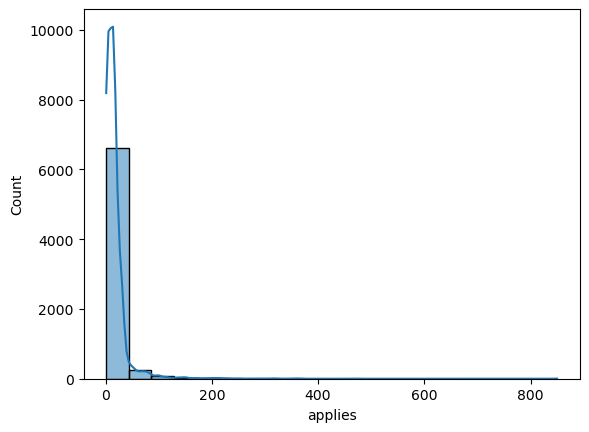

In [16]:
sns.histplot(state_rec['applies'], bins=20, kde = True) # shows extreme values for 'applies'

In [17]:
state_rec[state_rec['applies']>700]

,zip_code,job_id,applies,views,industry
1251,02114,3757481783,850.0,1599.0,Business Consulting and Services


In [18]:
state_rec=state_rec[state_rec['applies']<700]

/Users/nurgul/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='views', ylabel='Count'>

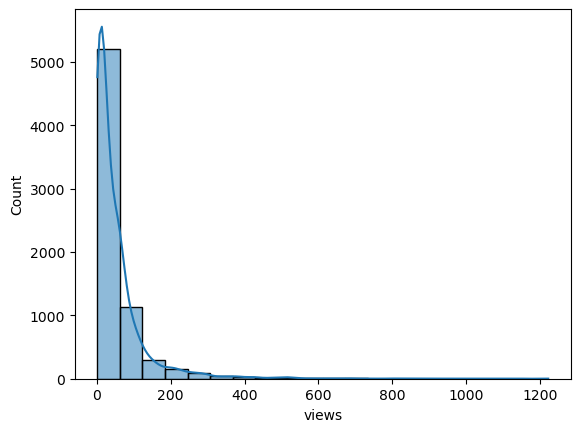

In [19]:
sns.histplot(state_rec['views'], bins=20, kde = True) # shows extreme values for 'views'

In [20]:
state_rec[state_rec['views']>1000]

,zip_code,job_id,applies,views,industry
1842,94401,3756925036,472.0,1132.0,Software Development
3950,10112-0002,3701320912,265.0,1006.0,Entertainment
4036,90038,3701315028,311.0,1056.0,Entertainment
4050,80202,3701314621,188.0,1098.0,Apparel and Fashion
4123,94041,3701308803,300.0,1138.0,Computer Software
5160,10577,3697383849,92.0,1223.0,Information Technology and Services
6209,0,3693070205,189.0,1026.0,Entertainment


In [21]:
state_rec=state_rec[state_rec['views']<1000]

In [22]:
state_rec.shape

(6988, 5)

In [23]:
state_rec = state_rec[state_rec['zip_code'].str.isnumeric()]

In [24]:
state_rec.shape

(6719, 5)

In [25]:
unique_industries = state_rec['industry'].unique()

print("Unique Industries:")
for industry in unique_industries:
    print(industry)


Unique Industries:
Financial Services
Staffing and Recruiting
Retail Office Equipment
Wholesale
Hospitals and Health Care
Biotechnology Research
Entertainment
Food Production
Retail
Telecommunications
Defense and Space Manufacturing
Manufacturing
Computer Hardware Manufacturing
Furniture and Home Furnishings Manufacturing
Retail Apparel and Fashion
Construction
Apparel and Fashion
Hospitality
Software Development
Real Estate
Non-profit Organizations
Banking
Insurance
Mining
Education Administration Programs
Spectator Sports
Government Administration
Chemicals
Mental Health Care
Restaurants
Research Services
Automotive
Management Consulting
Textile Manufacturing
Entertainment Providers
Automation Machinery Manufacturing
IT Services and IT Consulting
Motor Vehicle Manufacturing
Accounting
Legal Services
Non-profit Organization Management
Wellness and Fitness Services
Building Materials
Computer Software
Law Practice
Civil Engineering
Food and Beverage Manufacturing
Information Technology

In [26]:
# Define a function to group similar industries
def group_industry(industry):
    if 'Information Technology' in industry or 'Software' in industry or 'IT Services' in industry or 'Computer' in industry:
        return 'Information Technology'
    elif 'Manufacturing' in industry or 'Semiconductor' in industry or 'Industrial Machinery' in industry or 'Electronics' in industry:
        return 'Manufacturing and Engineering'
    elif 'Health Care' in industry or 'Medical Device' in industry or 'Biotechnology' in industry or 'Pharmaceutical' in industry:
        return 'Health Care and Life Sciences'
    elif 'Financial Services' in industry or 'Banking' in industry or 'Insurance' in industry or 'Investment' in industry:
        return 'Financial Services'
    elif 'Retail' in industry or 'Apparel' in industry or 'Fashion' in industry or 'E-commerce' in industry:
        return 'Retail and E-commerce'
    elif 'Entertainment' in industry or 'Media' in industry or 'Broadcast Media' in industry or 'Gaming' in industry:
        return 'Entertainment and Media'
    elif 'Construction' in industry or 'Building Materials' in industry or 'Architecture' in industry:
        return 'Construction and Architecture'
    elif 'Education' in industry or 'Primary/Secondary Education' in industry or 'Higher Education' in industry:
        return 'Education'
    elif 'Consulting and Management' in industry or 'Management Consulting' in industry or 'Business Consulting' in industry:
        return 'Consulting and Management'
    elif 'Health, Wellness, and Fitness' in industry or 'Wellness and Fitness Services' in industry:
        return 'Health and Wellness'
    elif 'Real Estate' in industry or 'Property' in industry or 'Real Estate Services' in industry:
        return 'Real Estate'
    elif 'Aerospace' in industry or 'Aviation' in industry:
        return 'Aerospace and Aviation'
    elif 'Telecommunications' in industry or 'Communication' in industry:
        return 'Telecommunications'
    elif 'Food and Beverage' in industry or 'Food Production' in industry or 'Beverages' in industry or 'Restaurants' in industry:
        return 'Food and Beverage'
    elif 'Automotive' in industry or 'Vehicles' in industry or 'Automobile' in industry:
        return 'Automotive'
    elif 'Energy' in industry or 'Renewable Energy' in industry or 'Oil and Gas' in industry:
        return 'Energy'
    elif 'Transportation' in industry or 'Logistics' in industry or 'Shipping' in industry:
        return 'Transportation and Logistics'
    elif 'Government Administration' in industry or 'Public Policy' in industry or 'Government' in industry:
        return 'Government and Public Policy'
    elif 'Non-profit' in industry or 'Social Services' in industry:
        return 'Non-profit'
    elif 'Textile Manufacturing' in industry or 'Apparel Manufacturing' in industry:
        return 'Textile and Apparel Manufacturing'
    elif 'Chemicals' in industry or 'Chemical Manufacturing' in industry:
        return 'Chemicals'
    elif 'Mining' in industry or 'Metal' in industry or 'Minerals' in industry:
        return 'Mining and Metals'
    elif 'Utilities' in industry or 'Energy Utilities' in industry:
        return 'Utilities'
    elif 'Hospitality' in industry or 'Restaurants' in industry or 'Travel' in industry:
        return 'Hospitality and Travel'
    else:
        return 'Other'

# Create a new column 'grouped_industry' based on the grouping function
state_rec['grouped_industry'] = state_rec['industry'].apply(group_industry)

# Display the DataFrame with the new 'grouped_industry' column
print(state_rec[['industry', 'grouped_industry']])


                       industry               grouped_industry
0            Financial Services             Financial Services
1       Staffing and Recruiting                          Other
2       Retail Office Equipment          Retail and E-commerce
3                     Wholesale                          Other
4            Financial Services             Financial Services
...                         ...                            ...
6991  Hospitals and Health Care  Health Care and Life Sciences
6992  Hospitals and Health Care  Health Care and Life Sciences
6993  Hospitals and Health Care  Health Care and Life Sciences
6994                 Automotive                     Automotive
6995                Real Estate                    Real Estate

[6719 rows x 2 columns]


In [27]:
state_rec = state_rec[state_rec['zip_code'].str.isnumeric()]

In [28]:
import folium
import pandas as pd

# Assuming 'zip_code' and 'applies' columns in grouped_data DataFrame
# Adjust the column names accordingly

# Load GeoJSON data (assuming you already have 'us-states.json' file)
with open("us-states.json", "r") as f:
    geo_data = json.load(f)

# Setup a folium map at a high-level zoom
map = folium.Map(location=[37.7749, -122.4194], zoom_start=4)

# Choropleth map
folium.Choropleth(
    geo_data=geo_data,
    data=state_rec,
    columns=['zip_code', 'applies'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name="Total Applies"
).add_to(map)

# Display the map
map


In [29]:
state_rec.head(20)

,zip_code,job_id,applies,views,industry,grouped_industry
0,46268,3757935001,18.329151,66.426309,Financial Services,Financial Services
1,92025,3757934319,1.000000,5.000000,Staffing and Recruiting,Other
2,94607,3757934318,15.568389,56.874644,Retail Office Equipment,Retail and E-commerce
3,76262,3757934267,15.568389,56.874644,Wholesale,Other
4,46268,3757934264,18.329151,66.426309,Financial Services,Financial Services
5,46268,3757934178,18.329151,66.426309,Financial Services,Financial Services
6,46268,3757934003,18.329151,66.426309,Financial Services,Financial Services
7,46268,3757933435,18.329151,66.426309,Financial Services,Financial Services
8,46268,3757933252,18.329151,66.426309,Financial Services,Financial Services
9,46268,3757932799,18.329151,66.426309,Financial Services,Financial Services


In [30]:
#Export merged_2_df dataframe 
state_rec.to_csv('job_posts_clean_groupedindustries.csv', index=False)

In [32]:
state_rec.shape

(6719, 6)